In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import getpass
import seaborn as sns
# for configuring connection 
from configobj import ConfigObj
import os

%matplotlib inline

In [2]:
# Create a database connection using settings from config file
config='../db/config.ini'

# connection info
conn_info = dict()
if os.path.isfile(config):
    config = ConfigObj(config)
    conn_info["sqluser"] = config['username']
    conn_info["sqlpass"] = config['password']
    conn_info["sqlhost"] = config['host']
    conn_info["sqlport"] = config['port']
    conn_info["dbname"] = config['dbname']
    conn_info["schema_name"] = config['schema_name']
else:
    conn_info["sqluser"] = 'postgres'
    conn_info["sqlpass"] = ''
    conn_info["sqlhost"] = '192.168.60.144'
    conn_info["sqlport"] = 6432
    conn_info["dbname"] = 'eicu'
    conn_info["schema_name"] = 'public,eicu_crd'
    
# Connect to the eICU database
print('Database: {}'.format(conn_info['dbname']))
print('Username: {}'.format(conn_info["sqluser"]))
if conn_info["sqlpass"] == '':
    # try connecting without password, i.e. peer or OS authentication
    try:
        if (conn_info["sqlhost"] == '192.168.60.144') & (conn_info["sqlport"]=='6432'):
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   user=conn_info["sqluser"])            
        else:
            con = psycopg2.connect(dbname=conn_info["dbname"],
                                   host=conn_info["sqlhost"],
                                   port=conn_info["sqlport"],
                                   user=conn_info["sqluser"])
    except:
        conn_info["sqlpass"] = getpass.getpass('Password: ')

        con = psycopg2.connect(dbname=conn_info["dbname"],
                               host=conn_info["sqlhost"],
                               port=conn_info["sqlport"],
                               user=conn_info["sqluser"],
                               password=conn_info["sqlpass"])
query_schema = 'set search_path to ' + conn_info['schema_name'] + ';'

Database: eicu
Username: postgres


In [3]:
from sqlalchemy import create_engine,text
con= create_engine('postgresql://eicu@192.168.60.144:6432/eicu')

In [2]:
datadir = '/home/mei/nas/docker/dataset/EICU/eicu-collaborative-research-database-2.0/'
porcesseddir2 = '/home/mei/nas/docker/processedData_2/'

In [3]:
def round_up(x, base=5):
    return base * round(x/base)

In [6]:
query = query_schema + """
select p.patientunitstayid, p.hospitaladmitOffset,l.labresultoffset,p.gender, p.age, 
      p.apacheadmissiondx,l.labname,l.labresult,p.unitadmitsource, p.admissionweight,	
      p.dischargeweight, p.unitdischargeoffset, p.unitdischargelocation,	
      p.unitdischargestatus
from lab l
join patient_2 p
  on l.patientunitstayid = p.patientunitstayid
  
order by p.patientunitstayid, p.hospitaladmitOffset,l.labresultoffset
"""

In [7]:
df_lab= pd.read_sql_query(query,con)
df_lab.head(n=20)

,patientunitstayid,hospitaladmitoffset,labresultoffset,gender,age,apacheadmissiondx,labname,labresult,unitadmitsource,admissionweight,dischargeweight,unitdischargeoffset,unitdischargelocation,unitdischargestatus
0,141168,0,231,Female,70,"Rhythm disturbance (atrial, supraventricular)",PT - INR,1.70,Direct Admit,84.3,85.8,3596,Death,Expired
1,141168,0,231,Female,70,"Rhythm disturbance (atrial, supraventricular)",PT,17.10,Direct Admit,84.3,85.8,3596,Death,Expired
2,141168,0,231,Female,70,"Rhythm disturbance (atrial, supraventricular)",PTT,29.00,Direct Admit,84.3,85.8,3596,Death,Expired
3,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",WBC x 1000,9.80,Direct Admit,84.3,85.8,3596,Death,Expired
4,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",albumin,3.10,Direct Admit,84.3,85.8,3596,Death,Expired
5,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",bicarbonate,26.00,Direct Admit,84.3,85.8,3596,Death,Expired
6,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",-eos,1.00,Direct Admit,84.3,85.8,3596,Death,Expired
7,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",total protein,7.10,Direct Admit,84.3,85.8,3596,Death,Expired
8,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",BUN,26.00,Direct Admit,84.3,85.8,3596,Death,Expired
9,141168,0,516,Female,70,"Rhythm disturbance (atrial, supraventricular)",PT - INR,1.90,Direct Admit,84.3,85.8,3596,Death,Expired


In [8]:
lab=df_lab.copy()
lab.set_index(['patientunitstayid', 'hospitaladmitoffset','labresultoffset'], inplace = True)
lab.drop(lab.index[np.where(lab.index.get_level_values('labresultoffset') < 0)], inplace= True)
# Pivot table
lab = pd.pivot_table(lab ,values = 'labresult', index=['patientunitstayid', 'hospitaladmitoffset','labresultoffset'], columns='labname')
lab.columns.name = None
# Resample every 5 mins
lab.rename(round_up, level = 'labresultoffset', inplace = True)
lab = lab.groupby(['patientunitstayid', 'hospitaladmitoffset','labresultoffset']).mean()
lab.head()


-bands  -basos  -eos  \
patientunitstayid hospitaladmitoffset labresultoffset                         
141168            0                   230                 NaN     NaN   NaN   
                                      515                 NaN     0.0   1.0   
                                      1135                NaN     0.0   0.0   
                                      1700                NaN     NaN   NaN   
                                      1805                NaN     NaN   NaN   

                                                       -lymphs  -monos  \
patientunitstayid hospitaladmitoffset labresultoffset                    
141168            0                   230                  NaN     NaN   
                                      515                 19.0    19.0   
                                      1135                 6.0    14.0   
                                      1700                 NaN     NaN   
                                      1805                 NaN     NaN   

                                                       -polys  \
patientunitstayid hospitaladmitoffset labresultoffset           
141168            0                   230                 NaN   
                                      515                61.0   
                                      1135               80.0   
                                      1700                NaN   
                                      1805                NaN   

                                                       24 h urine protein  \
patientunitstayid hospitaladmitoffset labresultoffset                       
141168            0                   230                             NaN   
                                      515                             NaN   
                                      1135                            NaN   
                                      1700                            NaN   
                                      1805                            NaN   

                                                       24 h urine urea nitrogen  \
patientunitstayid hospitaladmitoffset labresultoffset                             
141168            0                   230                                   NaN   
                                      515                                   NaN   
                                      1135                                  NaN   
                                      1700                                  NaN   
                                      1805                                  NaN   

                                                       ALT (SGPT)  ANF/ANA  \
patientunitstayid hospitaladmitoffset labresultoffset                        
141168            0                   230                     NaN      NaN   
                                      515                    40.0      NaN   
                                      1135                  358.0      NaN   
                                      1700                    NaN      NaN   
                                      1805                    NaN      NaN   

                                                       ...  total protein  \
patientunitstayid hospitaladmitoffset labresultoffset  ...                  
141168            0                   230              ...            NaN   
                                      515              ...            7.1   
                                      1135             ...            7.1   
                                      1700             ...            NaN   
                                      1805             ...            NaN   

                                                       transferrin  \
patientunitstayid hospitaladmitoffset labresultoffset                
141168            0                   230                      NaN   
                                      515                      NaN   
                                     

In [4]:
# lab.to_csv(porcesseddir2 + 'selected_lab.csv',  index=True)

lab= pd.read_csv(porcesseddir2 + 'selected_lab.csv')
lab.drop(columns = 'hospitaladmitoffset', inplace= True)
lab.set_index(['patientunitstayid', 'labresultoffset'], inplace = True)
lab.sort_index(level = ['patientunitstayid', 'labresultoffset'], inplace = True)

In [4]:
n=len(list(lab.index.get_level_values('patientunitstayid').unique()))
r=len(lab)
print("There are {} unique patientunitstayid in the selected patients with the total {} records.".format(n,r))

There are 67928 unique patientunitstayid in the selected patients with the total 1775099 records.


## 将时间轴（labresultoffset）集合起来，按照病人是否有过一次lab 进行记录

In [5]:
lab_binary = lab.copy() 

In [6]:
lab.head(n=10)

-bands  -basos  -eos  -lymphs  -monos  \
patientunitstayid labresultoffset                                          
141168            230                 NaN     NaN   NaN      NaN     NaN   
                  515                 NaN     0.0   1.0     19.0    19.0   
                  1135                NaN     0.0   0.0      6.0    14.0   
                  1700                NaN     NaN   NaN      NaN     NaN   
                  1805                NaN     NaN   NaN      NaN     NaN   
                  2010                NaN     NaN   NaN      NaN     NaN   
                  2025                NaN     0.0   0.0     10.0    12.0   
                  2140                NaN     NaN   NaN      NaN     NaN   
141265            530                 NaN     NaN   NaN      NaN     NaN   
                  535                 NaN     NaN   NaN      NaN     NaN   

                                   -polys  24 h urine protein  \
patientunitstayid labresultoffset                               
141168            230                 NaN                 NaN   
                  515                61.0                 NaN   
                  1135               80.0                 NaN   
                  1700                NaN                 NaN   
                  1805                NaN                 NaN   
                  2010                NaN                 NaN   
                  2025               78.0                 NaN   
                  2140                NaN                 NaN   
141265            530                 NaN                 NaN   
                  535                 NaN                 NaN   

                                   24 h urine urea nitrogen  ALT (SGPT)  \
patientunitstayid labresultoffset                                         
141168            230                                   NaN         NaN   
                  515                                   NaN        40.0   
                  1135                                  NaN       358.0   
                  1700                                  NaN         NaN   
                  1805                                  NaN         NaN   
                  2010                                  NaN         NaN   
                  2025                                  NaN      1189.0   
                  2140                                  NaN         NaN   
141265            530                                   NaN         NaN   
                  535                                   NaN         NaN   

                                   ANF/ANA  ...  total protein  transferrin  \
patientunitstayid labresultoffset           ...                               
141168            230                  NaN  ...            NaN          NaN   
                  515                  NaN  ...            7.1          NaN   
                  1135                 NaN  ...            7.1          NaN   
                  1700                 NaN  ...            NaN          NaN   
                  1805                 NaN  ...            NaN          NaN   
                  2010                 NaN  ...            NaN          NaN   
                  2025                 NaN  ...            6.3          NaN   
                  2140                 NaN  ...            NaN          NaN   
141265            530                  NaN  ...            NaN          NaN   
                  535                  NaN  ...            NaN          NaN   

                                   triglycerides  troponin - I  troponin - T  \
patientunitstayid labresultoffset                                              
141168            230                        NaN           NaN           NaN   
                  515                        NaN           NaN           NaN   
                  1135                       NaN           NaN           NaN   
                  1700                       NaN           NaN           NaN   
           

In [7]:
lab_binary.iloc[:, :] = lab_binary.iloc[:, :].notna().astype(int)   #NaN 值替换为 0，非 NaN 值替换为 1


In [8]:
lab_binary.head(n=10)

-bands  -basos  -eos  -lymphs  -monos  \
patientunitstayid labresultoffset                                          
141168            230                 0.0     0.0   0.0      0.0     0.0   
                  515                 0.0     1.0   1.0      1.0     1.0   
                  1135                0.0     1.0   1.0      1.0     1.0   
                  1700                0.0     0.0   0.0      0.0     0.0   
                  1805                0.0     0.0   0.0      0.0     0.0   
                  2010                0.0     0.0   0.0      0.0     0.0   
                  2025                0.0     1.0   1.0      1.0     1.0   
                  2140                0.0     0.0   0.0      0.0     0.0   
141265            530                 0.0     0.0   0.0      0.0     0.0   
                  535                 0.0     0.0   0.0      0.0     0.0   

                                   -polys  24 h urine protein  \
patientunitstayid labresultoffset                               
141168            230                 0.0                 0.0   
                  515                 1.0                 0.0   
                  1135                1.0                 0.0   
                  1700                0.0                 0.0   
                  1805                0.0                 0.0   
                  2010                0.0                 0.0   
                  2025                1.0                 0.0   
                  2140                0.0                 0.0   
141265            530                 0.0                 0.0   
                  535                 0.0                 0.0   

                                   24 h urine urea nitrogen  ALT (SGPT)  \
patientunitstayid labresultoffset                                         
141168            230                                   0.0         0.0   
                  515                                   0.0         1.0   
                  1135                                  0.0         1.0   
                  1700                                  0.0         0.0   
                  1805                                  0.0         0.0   
                  2010                                  0.0         0.0   
                  2025                                  0.0         1.0   
                  2140                                  0.0         0.0   
141265            530                                   0.0         0.0   
                  535                                   0.0         0.0   

                                   ANF/ANA  ...  total protein  transferrin  \
patientunitstayid labresultoffset           ...                               
141168            230                  0.0  ...            0.0          0.0   
                  515                  0.0  ...            1.0          0.0   
                  1135                 0.0  ...            1.0          0.0   
                  1700                 0.0  ...            0.0          0.0   
                  1805                 0.0  ...            0.0          0.0   
                  2010                 0.0  ...            0.0          0.0   
                  2025                 0.0  ...            1.0          0.0   
                  2140                 0.0  ...            0.0          0.0   
141265            530                  0.0  ...            0.0          0.0   
                  535                  0.0  ...            0.0          0.0   

                                   triglycerides  troponin - I  troponin - T  \
patientunitstayid labresultoffset                                              
141168            230                        0.0           0.0           0.0   
                  515                        0.0           0.0           0.0   
                  1135                       0.0           0.0           0.0   
                  1700                       0.0           0.0           0.0   
           

In [9]:
lab_summary = lab_binary.groupby('patientunitstayid').max()
lab_summary = lab_summary[(lab_summary.iloc[:, :] != 0).any(axis=1)]
# 如果一个病人在某个时间点没有任何实验室数据记录，该行将被删除。

In [10]:
lab_summary

,-bands,-basos,-eos,-lymphs,-monos,-polys,24 h urine protein,24 h urine urea nitrogen,ALT (SGPT),ANF/ANA,...,total protein,transferrin,triglycerides,troponin - I,troponin - T,uric acid,urinary creatinine,urinary osmolality,urinary sodium,urinary specific gravity
patientunitstayid,,,,,,,,,,,,,,,,,,,,,
141168,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
141265,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141266,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
141276,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141284,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3353147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3353194,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3353213,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
n=len(list(lab_summary.index.get_level_values('patientunitstayid').unique()))
r=len(lab_summary)
print("There are {} unique patientunitstayid in the selected patients with the total {} records after delete the patients who didn't take any lab test.".format(n,r))

There are 67928 unique patientunitstayid in the selected patients with the total 67928 records after delete the patients who didn't take any lab test.


In [12]:
missing_ratio = pd.DataFrame((lab_summary == 0).sum() / len(lab_summary.index), columns = ['missing ratio %']) * 100
missing_ratio.sort_values('missing ratio %', inplace = True, ascending = False) 


In [13]:
pd.options.display.max_rows = None
missing_ratio

,missing ratio %
HSV 1&2 IgG AB,99.998528
HSV 1&2 IgG AB titer,99.998528
Procainamide,99.997056
NAPA,99.997056
Site,99.995584
HIV 1&2 AB,99.992639
Legionella pneumophila Ab,99.992639
Clostridium difficile toxin A+B,99.988223
Amikacin - trough,99.986751
Vancomycin - peak,99.983806


In [14]:
low_zero_ratio_tests = missing_ratio[missing_ratio['missing ratio %'] < 50]

low_zero_ratio_tests_names = low_zero_ratio_tests.index.tolist()

print("lab test of missing_ratio < 50%:")
for test_name in low_zero_ratio_tests_names:
    print(test_name)

lab test of missing_ratio < 50%:
phosphate
total bilirubin
alkaline phos.
ALT (SGPT)
total protein
AST (SGOT)
-polys
albumin
bedside glucose
-basos
MPV
-eos
-monos
-lymphs
magnesium
anion gap
MCH
RDW
bicarbonate
MCHC
MCV
platelets x 1000
RBC
calcium
Hgb
WBC x 1000
Hct
chloride
glucose
potassium
BUN
creatinine
sodium


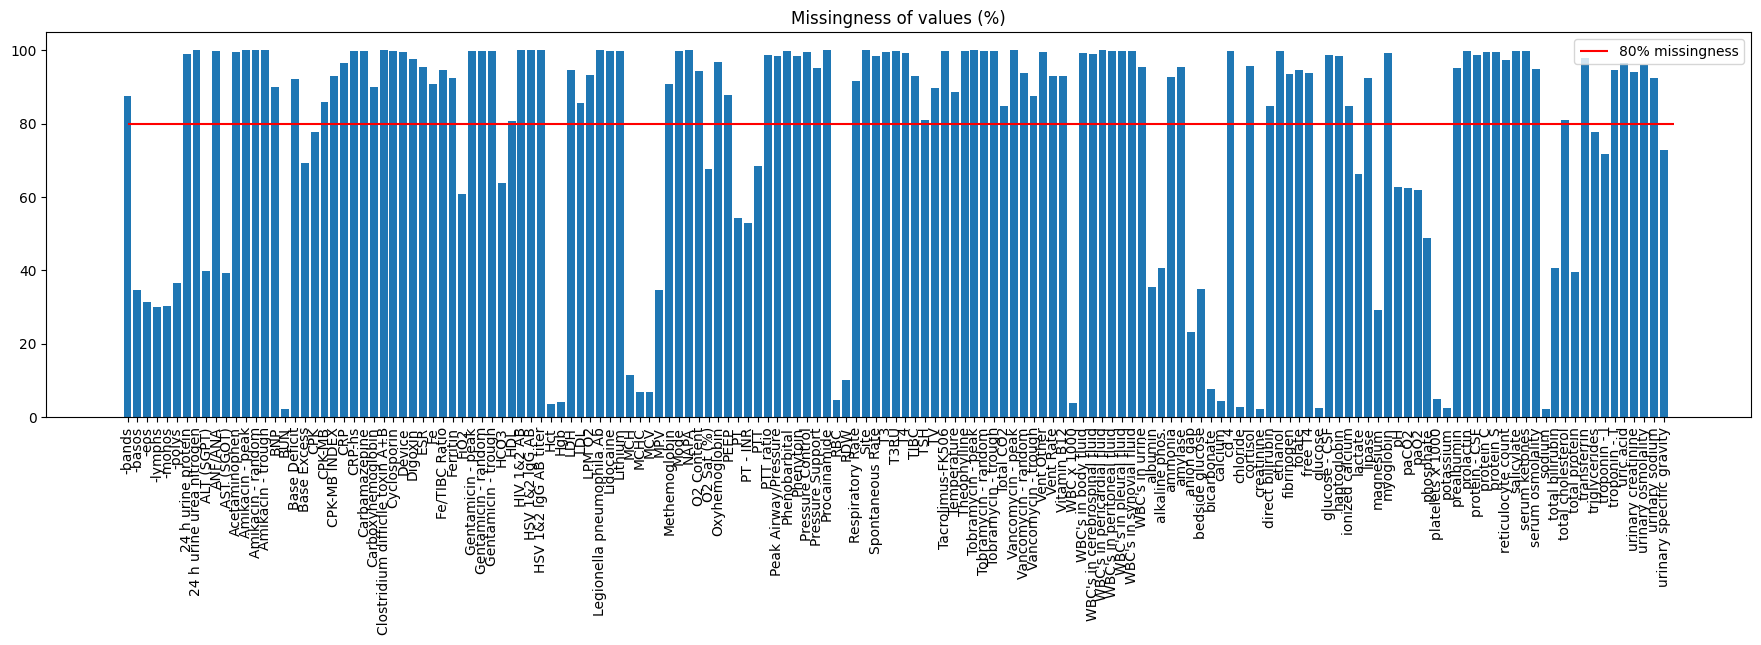

In [15]:
plt.rcParams["figure.figsize"] = (22,5)
missing_ratio = pd.DataFrame((lab_summary == 0).sum() / len(lab_summary.index), columns = ['missing ratio']) * 100
plt.title('Missingness of values (%)')
plt.bar(missing_ratio.index, missing_ratio['missing ratio'])
plt.xticks(np.arange(0, len(missing_ratio.index)), labels=missing_ratio.index, rotation=90)
plt.hlines(80, 0, len(missing_ratio.index), colors = 'red', label = '80% missingness')
plt.legend()
plt.show()

In [16]:
missing_count = pd.DataFrame((lab_summary == 0).sum(), columns = ['missing count'])
missing_count.sort_values('missing count', inplace = True, ascending = False) 
missing_count

,missing count
HSV 1&2 IgG AB,67927
HSV 1&2 IgG AB titer,67927
Procainamide,67926
NAPA,67926
Site,67925
HIV 1&2 AB,67923
Legionella pneumophila Ab,67923
Clostridium difficile toxin A+B,67920
Amikacin - trough,67919
Vancomycin - peak,67917


In [17]:
labdone_count = pd.DataFrame((lab_summary == 1).sum(), columns = ['labdone count'])
labdone_count.sort_values('labdone count', inplace = True, ascending = True) 
labdone_count

,labdone count
HSV 1&2 IgG AB,1
HSV 1&2 IgG AB titer,1
NAPA,2
Procainamide,2
Site,3
HIV 1&2 AB,5
Legionella pneumophila Ab,5
Clostridium difficile toxin A+B,8
Amikacin - trough,9
WBC's in pericardial fluid,11


In [30]:
labdone_count.to_csv(porcesseddir2 + 'lab_done_missing_ratio_count.csv',  index=True)

In [20]:
low_zero_ratio_tests = missing_ratio[missing_ratio['missing ratio'] > 50]

low_zero_ratio_tests = low_zero_ratio_tests.index.tolist()
low_zero_ratio_tests

['-bands',
 '24 h urine protein',
 '24 h urine urea nitrogen',
 'ANF/ANA',
 'Acetaminophen',
 'Amikacin - peak',
 'Amikacin - random',
 'Amikacin - trough',
 'BNP',
 'Base Deficit',
 'Base Excess',
 'CPK',
 'CPK-MB',
 'CPK-MB INDEX',
 'CRP',
 'CRP-hs',
 'Carbamazepine',
 'Carboxyhemoglobin',
 'Clostridium difficile toxin A+B',
 'Cyclosporin',
 'Device',
 'Digoxin',
 'ESR',
 'Fe',
 'Fe/TIBC Ratio',
 'Ferritin',
 'FiO2',
 'Gentamicin - peak',
 'Gentamicin - random',
 'Gentamicin - trough',
 'HCO3',
 'HDL',
 'HIV 1&2 AB',
 'HSV 1&2 IgG AB',
 'HSV 1&2 IgG AB titer',
 'LDH',
 'LDL',
 'LPM O2',
 'Legionella pneumophila Ab',
 'Lidocaine',
 'Lithium',
 'Methemoglobin',
 'Mode',
 'NAPA',
 'O2 Content',
 'O2 Sat (%)',
 'Oxyhemoglobin',
 'PEEP',
 'PT',
 'PT - INR',
 'PTT',
 'PTT ratio',
 'Peak Airway/Pressure',
 'Phenobarbital',
 'Phenytoin',
 'Pressure Control',
 'Pressure Support',
 'Procainamide',
 'Respiratory Rate',
 'Site',
 'Spontaneous Rate',
 'T3',
 'T3RU',
 'T4',
 'TIBC',
 'TSH',
 'TV',

In [21]:
labdone_count_interested = pd.DataFrame((lab_summary[low_zero_ratio_tests] == 1).sum(), columns = ['labdone_low count'])
labdone_count_interested .sort_values('labdone_low count', inplace = True, ascending = True) 
labdone_count_interested 

,labdone_low count
HSV 1&2 IgG AB titer,1
HSV 1&2 IgG AB,1
Procainamide,2
NAPA,2
Site,3
Legionella pneumophila Ab,5
HIV 1&2 AB,5
Clostridium difficile toxin A+B,8
Amikacin - trough,9
WBC's in pericardial fluid,11


## Before

In [22]:
lab.head()

-bands  -basos  -eos  -lymphs  -monos  \
patientunitstayid labresultoffset                                          
141168            230                 NaN     NaN   NaN      NaN     NaN   
                  515                 NaN     0.0   1.0     19.0    19.0   
                  1135                NaN     0.0   0.0      6.0    14.0   
                  1700                NaN     NaN   NaN      NaN     NaN   
                  1805                NaN     NaN   NaN      NaN     NaN   

                                   -polys  24 h urine protein  \
patientunitstayid labresultoffset                               
141168            230                 NaN                 NaN   
                  515                61.0                 NaN   
                  1135               80.0                 NaN   
                  1700                NaN                 NaN   
                  1805                NaN                 NaN   

                                   24 h urine urea nitrogen  ALT (SGPT)  \
patientunitstayid labresultoffset                                         
141168            230                                   NaN         NaN   
                  515                                   NaN        40.0   
                  1135                                  NaN       358.0   
                  1700                                  NaN         NaN   
                  1805                                  NaN         NaN   

                                   ANF/ANA  ...  total protein  transferrin  \
patientunitstayid labresultoffset           ...                               
141168            230                  NaN  ...            NaN          NaN   
                  515                  NaN  ...            7.1          NaN   
                  1135                 NaN  ...            7.1          NaN   
                  1700                 NaN  ...            NaN          NaN   
                  1805                 NaN  ...            NaN          NaN   

                                   triglycerides  troponin - I  troponin - T  \
patientunitstayid labresultoffset                                              
141168            230                        NaN           NaN           NaN   
                  515                        NaN           NaN           NaN   
                  1135                       NaN           NaN           NaN   
                  1700                       NaN           NaN           NaN   
                  1805                       NaN           NaN           NaN   

                                   uric acid  urinary creatinine  \
patientunitstayid labresultoffset                                  
141168            230                    NaN                 NaN   
                  515                    NaN                 NaN   
                  1135                   8.1                 NaN   
                  1700                   NaN              173.12   
                  1805                   NaN                 NaN   

                                   urinary osmolality  urinary sodium  \
patientunitstayid labresultoffset                                       
141168            230                             NaN             NaN   
                  515                             NaN             NaN   
                  1135                            NaN             NaN   
                  1700                            NaN            12.0   
                  1805                            NaN             NaN   

                                   urinary specific gravity  
patientunitstayid labresultoffset                            
141168            230                                   NaN  
                  515                                   NaN  
                  1135                                  NaN  
                  1700                                  NaN  
                  1805                      

In [23]:
missing_ratio = pd.DataFrame(lab.isna().sum() / len(lab.index), columns = ['missing ratio %']) * 100
missing_ratio.sort_values('missing ratio %', inplace = True, ascending = False) 
missing_ratio

,missing ratio %
HSV 1&2 IgG AB,99.999944
HSV 1&2 IgG AB titer,99.999944
Procainamide,99.999887
NAPA,99.999887
Site,99.999831
HIV 1&2 AB,99.999718
Legionella pneumophila Ab,99.999718
Clostridium difficile toxin A+B,99.999549
WBC's in pericardial fluid,99.999324
Vancomycin - peak,99.999324


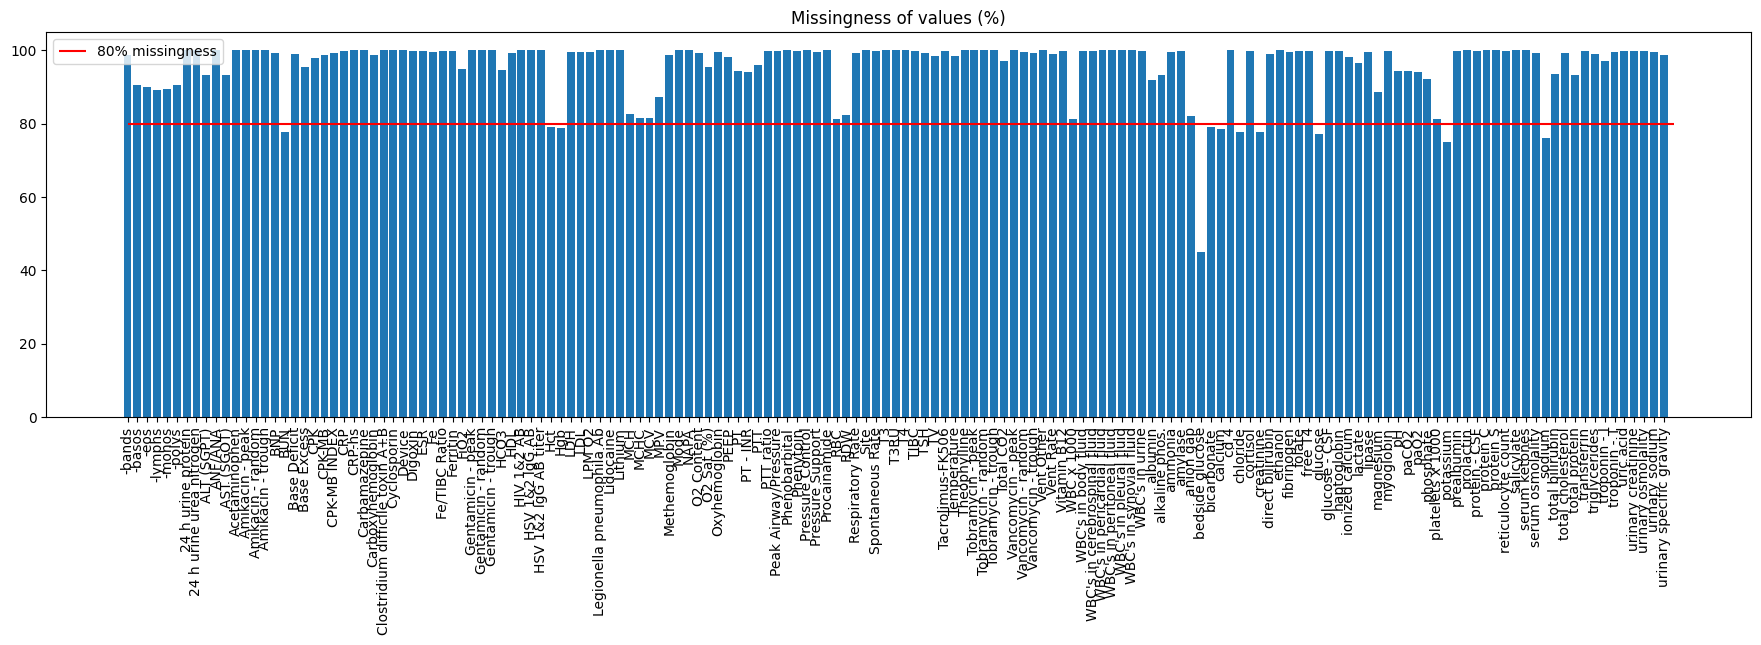

In [24]:
plt.rcParams["figure.figsize"] = (22,5)
missing_ratio = pd.DataFrame(lab.isna().sum() / len(lab.index), columns = ['missing ratio']) * 100
plt.title('Missingness of values (%)')
plt.bar(missing_ratio.index, missing_ratio['missing ratio'])
plt.xticks(np.arange(0, len(missing_ratio.index)), labels=missing_ratio.index, rotation=90)
plt.hlines(80, 0, len(missing_ratio.index), colors = 'red', label = '80% missingness')
plt.legend()
plt.show()

In [25]:

pd.options.display.max_columns = None

In [26]:
lab.describe(percentiles=[0.001, 0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99, 0.999])

,-bands,-basos,-eos,-lymphs,-monos,-polys,24 h urine protein,24 h urine urea nitrogen,ALT (SGPT),ANF/ANA,AST (SGOT),Acetaminophen,Amikacin - peak,Amikacin - random,Amikacin - trough,BNP,BUN,Base Deficit,Base Excess,CPK,CPK-MB,CPK-MB INDEX,CRP,CRP-hs,Carbamazepine,Carboxyhemoglobin,Clostridium difficile toxin A+B,Cyclosporin,Device,Digoxin,ESR,Fe,Fe/TIBC Ratio,Ferritin,FiO2,Gentamicin - peak,Gentamicin - random,Gentamicin - trough,HCO3,HDL,HIV 1&2 AB,HSV 1&2 IgG AB,HSV 1&2 IgG AB titer,Hct,Hgb,LDH,LDL,LPM O2,Legionella pneumophila Ab,Lidocaine,Lithium,MCH,MCHC,MCV,MPV,Methemoglobin,Mode,NAPA,O2 Content,O2 Sat (%),Oxyhemoglobin,PEEP,PT,PT - INR,PTT,PTT ratio,Peak Airway/Pressure,Phenobarbital,Phenytoin,Pressure Control,Pressure Support,Procainamide,RBC,RDW,Respiratory Rate,Site,Spontaneous Rate,T3,T3RU,T4,TIBC,TSH,TV,Tacrolimus-FK506,Temperature,Theophylline,Tobramycin - peak,Tobramycin - random,Tobramycin - trough,Total CO2,Vancomycin - peak,Vancomycin - random,Vancomycin - trough,Vent Other,Vent Rate,Vitamin B12,WBC x 1000,WBC's in body fluid,WBC's in cerebrospinal fluid,WBC's in pericardial fluid,WBC's in peritoneal fluid,WBC's in pleural fluid,WBC's in synovial fluid,WBC's in urine,albumin,alkaline phos.,ammonia,amylase,anion gap,bedside glucose,bicarbonate,calcium,cd 4,chloride,cortisol,creatinine,direct bilirubin,ethanol,fibrinogen,folate,free T4,glucose,glucose - CSF,haptoglobin,ionized calcium,lactate,lipase,magnesium,myoglobin,pH,paCO2,paO2,phosphate,platelets x 1000,potassium,prealbumin,prolactin,protein - CSF,protein C,protein S,reticulocyte count,salicylate,serum ketones,serum osmolality,sodium,total bilirubin,total cholesterol,total protein,transferrin,triglycerides,troponin - I,troponin - T,uric acid,urinary creatinine,urinary osmolality,urinary sodium,urinary specific gravity
count,21299.000000,166947.000000,176827.000000,189977.000000,188816.000000,166434.000000,672.000000,20.000000,118203.000000,71.000000,119375.000000,602.000000,20.000000,37.000000,14.000000,10552.000000,393679.000000,16486.000000,81312.000000,36262.000000,22873.000000,10798.000000,3396.000000,230.000000,205.000000,23228.000000,8.000000,152.000000,666.000000,2256.000000,3619.000000,6694.000000,3862.000000,5441.000000,92052.00000,95.000000,230.000000,171.000000,96678.000000,13803.000000,5.000000,1.0,1.00,372246.000000,377793.000000,6044.000000,10251.000000,6758.000000,5.000000,55.000000,433.000000,310462.000000,325410.000000,325591.000000,226798.000000,21761.000000,112.000000,2.0,14330.000000,82705.000000,7161.000000,33055.000000,100494.000000,103906.000000,72986.000000,3138.000000,2602.000000,212.000000,2151.000000,624.000000,6264.000000,2.0,331184.000000,311233.000000,14394.000000,3.000000,2228.000000,272.000000,141.000000,552.000000,5106.000000,13810.000000,25996.000000,872.000000,27408.000000,209.000000,32.000000,267.000000,60.000000,49865.000000,12.000000,7711.000000,14292.000000,525.000000,16828.000000,4961.000000,332388.000000,689.000000,754.000000,12.000000,73.000000,117.000000,47.000000,3791.000000,141854.000000,117420.000000,8736.000000,4659.000000,315796.000000,978019.000000,372209.000000,381311.000000,138.000000,396769.000000,3410.000000,395602.000000,19636.000000,197.000000,9364.000000,3706.000000,4466.000000,403117.000000,1037.000000,1292.000000,32956.000000,60623.000000,8414.000000,199969.000000,840.000000,100979.000000,101712.000000,102640.000000,138954.000000,333648.000000,444780.000000,4814.000000,220.000000,1039.000000,303.000000,261.000000,2126.000000,448.000000,340.000000,10361.000000,422131.000000,116828.000000,13757.000000,118988.000000,1418.000000,18712.000000,50673.000000,10114.000000,3955.000000,4660.000000,3396.000000,5879.000000,22942.000000
mean,9.464778,0.295523,1.797740,14.329789,7.886985,73.929142,520.465179,9.357800,121.267417,46.164558,156.417382,32.856894,17.360000,8.772973,6.485714,2421.814992,27.996959,5.584450,0.102308,1953.125342,33.223622,5.039085,127.941727,63.369043,9.660244,1.065647,1.375000,132.499342,